In [1]:
'''This code needs to take the Image_CAS_gini_M20 output (which includes r_e)
as well as the output from the Summit velocity maps and make an input to kinemetry
with a hexagonal mask'''


'This code needs to take the Image_CAS_gini_M20 output (which includes r_e)\nas well as the output from the Summit velocity maps and make an input to kinemetry\nwith a hexagonal mask'

In [1]:
import os
import pyfits
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from astropy.cosmology import WMAP9 as cosmo
print(os.getcwd())

/Volumes/My Passport for Mac/LAURA_Sims


In [97]:

os.chdir(os.path.expanduser('/Volumes/My Passport For Mac/LAURA_SIMS'))
view=0
output_number=200

output='GALFIT_folder/out_'+str(view)+'_'+str(output_number)+'.fits'
out=pyfits.open(output)
r_e=out[2].header['1_RE']
#print(out[2].header)
print(float(r_e[0:5]))

'''also figure out where the center is'''
print(out[2].header['1_XC'])
print(out[2].header['1_YC'])

print(out[2].header)


'''But this effective radius is in pixels, so how do we convert it to arcsec?'''
redshift=0.03
kpc_arcmin=cosmo.kpc_proper_per_arcmin(redshift)#insert the redshift  
    #print(kpc_arcmin.value/60, 'kpc per arcsec')
'''Divide the pixelscale (kpc) by kpc/arcsec to get arcsec
    size of pixels'''
image='q0.5_fg0.3_allrx10/broadband_'+str(output_number)+'.fits'
im=pyfits.open(image)
pixelscale =  im['CAMERA'+str(view)+'-BROADBAND'].header['CD1_1']
size_a=pixelscale/(kpc_arcmin.value/60)
print('size of a pixel in arcsec', size_a)
print('2*r_e in arcsec',1.5*2*float(r_e[0:5])*size_a)
arcs_totes=1.5*2*float(r_e[0:5])*size_a
#kinemetry_input_append_x.txt

30.62
92.6069 +/- 0.0157
92.3732 +/- 0.0109
XTENSION= 'IMAGE   '           / IMAGE extension                                BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    2 / Number of axes                                 NAXIS1  =                  182 / Length of data axis 1                          NAXIS2  =                  182 / Length of data axis 2                          OBJECT  = 'model   '           / Component type                                 COMMENT ========== GALFIT Input Parameters ==========                           INITFILE= 'galfit.feedme_0_200' / GALFIT input file                             DATAIN  = 'out_convolved_0_200.fits' / Input data image                         SIGMA   = 'out_sigma_convolved_0_200.fits' / Input sigma image                  PSF     = 'none    '           / Convolution PSF and kernel                     CONSTRNT= 'none    '           / Parameter constraint file                  

In [98]:
if arcs_totes > 32.5:
    n_fibers=127
    dia = 32.5
else:
    if arcs_totes > 27.5:
        n_fibers=91
        dia = 27.5
    else:
        if arcs_totes > 22.5:
            n_fibers=61
            dia=22.5
        else:
            if arcs_totes > 17.5:
                n_fibers=37
                dia=17.5
            else:
                n_fibers=19
                dia = 12.5
print(n_fibers,'fibers', 'diameter', dia)

61 fibers diameter 22.5


In [99]:
'''extract a square around the center of the velocity map'''
print(os.getcwd())
os.chdir(os.path.expanduser('/Volumes/My Passport for Mac/LAURA_Sims/q0.5_fg0.3_allrx10_sunruns/hirestest_kin/Figs')) # path to the simulated images
print(os.getcwd())
old_kin='kinemetry_input_append_51_0.txt'
size=183

/Volumes/My Passport for Mac/LAURA_Sims
/Volumes/My Passport for Mac/LAURA_Sims/q0.5_fg0.3_allrx10_sunruns/hirestest_kin/Figs


In [100]:

with open(old_kin, 'r') as f:
    data = f.readlines()
    #print(data)
    stel_vel=np.zeros((size,size))
    stel_vel_e=np.zeros((size,size))
    stel_disp=np.zeros((size,size))
    stel_disp_e=np.zeros((size,size))
    
    x_list=[]
    y_list=[]
    vel_list=[]
    vel_e_list=[]
    sig_list=[]
    sig_e_list=[]


    for line in data:
        words = line.split()

        if (words[0]) != 'Beginning':
            
            x_list.append(float(words[0]))
            y_list.append(float(words[1]))
            vel_list.append(float(words[2]))
            vel_e_list.append(float(words[3]))
            sig_list.append(float(words[4]))
            sig_e_list.append(float(words[5]))

            '''xs=int(round(float(words[0]),0))
            ys=int(round(float(words[1]),0))

            
            if float(words[2]) !=0:

                #if float(words[3]) > 0.1:#abs(float(words[3])/float(words[2])) < 0.2:
                stel_vel[xs,ys] = float(words[2])
                stel_vel_e[xs,ys] = float(words[3])

                stel_disp[xs,ys] = float(words[4])
                stel_disp_e[xs,ys] = float(words[5])
                
                
                
            else:
                stel_vel[xs,ys] = 0
                stel_vel_e[xs,ys] = 0

                stel_disp[xs,ys] = 0
                stel_disp_e[xs,ys] = 0
plt.imshow(np.flipud(np.rot90(stel_vel)), vmin=-150, vmax=150, cmap='gist_rainbow_r')
plt.colorbar()
plt.show()

cen_x=size/2
cen_y=size/2'''

In [101]:
'''Now, make a mask'''
'''
Each pixel is 0.5"
We know the map is already centered
Try sending the whole thing into kinemetry
XBIN = x_cen-x; x_cen is size/2
'''

'''
Argh really not looking forward to possibly constructing a hexagonal mask myself
'''


from matplotlib import path

nx, ny = 10, 10
poly_verts = path.Path([(size/2-(dia-0.5),size/2-(dia-0.5)), (size/2+(dia-0.5),size/2-(dia-0.5)),
                        (size/2+(dia-0.5),size/2+(dia-0.5)), (size/2-(dia-0.5),size/2+(dia-0.5))])

print(poly_verts)
xy=np.column_stack((x_list,y_list))

inside=poly_verts.contains_points(xy)

'''
The input to contains_points must be an array with x and y coordinates (blah)
'''


print(np.shape(inside))
print(np.shape(vel_list))

Path(array([[  69.5,   69.5],
       [ 113.5,   69.5],
       [ 113.5,  113.5],
       [  69.5,  113.5]]), None)
(33489,)
(33489,)


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:35: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:38: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


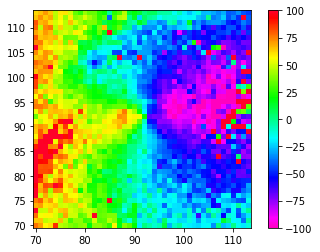

In [102]:
'''
So now I need to mask out everything that is False in inside
'''

stel_vel=np.zeros((size,size))
stel_vel_e=np.zeros((size,size))
stel_disp=np.zeros((size,size))
stel_disp_e=np.zeros((size,size))

x_list_after=[]
y_list_after=[]
vel_list_after=[]
vel_e_list_after=[]
sig_list_after=[]
sig_e_list_after=[]

for i in range(len(inside)):
    if inside[i]==True:
        
        '''Then do all the stuff'''
        x_list_after.append(x_list[i])
        y_list_after.append(y_list[i])
        vel_list_after.append(vel_list[i])
        vel_e_list_after.append(vel_e_list[i])
        sig_list_after.append(sig_list[i])
        sig_e_list_after.append(sig_e_list[i])

        xs=x_list[i]
        ys=y_list[i]

        '''if float(words[2]) != 0 and float(words[4]) != 0:

            if abs(float(words[3])/float(words[2])) < 10 and abs(float(words[5])/float(words[4])) < 10:
             '''   
        stel_vel[xs,ys] = vel_list[i]
        stel_vel_e[xs,ys] = vel_e_list[i]

        stel_disp[xs,ys] = sig_list[i]
        stel_disp_e[xs,ys] = sig_e_list[i]

        '''else:
                stel_vel[xs,ys] = 0
                stel_vel_e[xs,ys] = 0

                stel_disp[xs,ys] = 0
                stel_disp_e[xs,ys] = 0'''
        
        
        
rotated= stel_vel#np.flipud(np.rot90(
rotated=ma.masked_where(rotated==0, rotated)

rotated_sig= stel_disp
rotated_sig=ma.masked_where(rotated==0, rotated_sig)
plt.imshow(rotated, vmin=-100, vmax=100, cmap='gist_rainbow_r')
plt.colorbar()
plt.xlim([size/2-(dia-0.5),size/2+(dia-0.5)])
plt.ylim([size/2-(dia-0.5),size/2+(dia-0.5)])
plt.show()

cen_x=size/2
cen_y=size/2

In [75]:
#def new_kinemetry(masked, masked_e, masked_d, masked_d_e, middle_x, middle_y):
'''
x_list.append(float(words[0]))
y_list.append(float(words[1]))
vel_list.append(float(words[2]))
vel_e_list.append(float(words[3]))
sig_list.append(float(words[4]))
sig_e_list.append(float(words[5]))
''' 
#os.chdir(os.path.expanduser('~/Documents/LAURA_Sims/'))
print(os.getcwd())
file2=open('../../../kinemetry_input/kinemetry_200_0.txt','w')
file2.write('#'+'\t'+'XBIN'+'\t'+'YBIN'+'\t'+'VEL'+'\t'+'ER_VEL'+'\t'+'SIG'+'\t'+'ER_SIG'+'\n')

middle_x=size/2
middle_y=size/2

counter=1
#for j in range(size):
'''if str(masked[i,j])== '--':
    continue
else:'''
for i in range(len(x_list_after)):
    file2.write(str(counter)+'\t'+str(x_list_after[i]-middle_x)+'\t'+str(y_list_after[i]-middle_y)+'\t')
    file2.write(str(vel_list_after[i])+'\t'+str(vel_e_list_after[i])+'\t'+str(sig_list_after[i])+'\t'+str(sig_e_list_after[i])+'\n')
    #print(counter, i, j, masked[i,j])
    counter +=1

file2.close()

/Volumes/My Passport for Mac/LAURA_Sims/q0.5_fg0.3_allrx10_sunruns/hirestest_kin/Figs


/Volumes/My Passport for Mac/LAURA_Sims/kinemetry_input


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:33: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


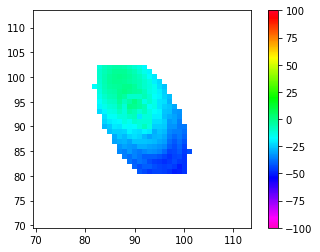

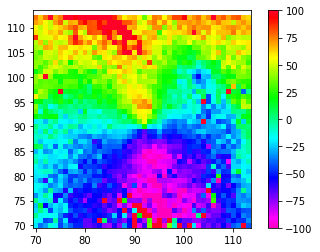

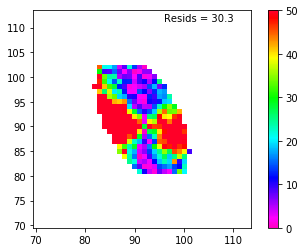

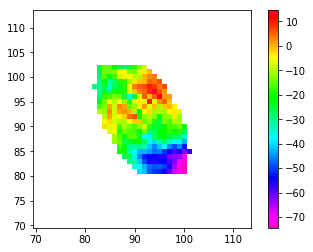

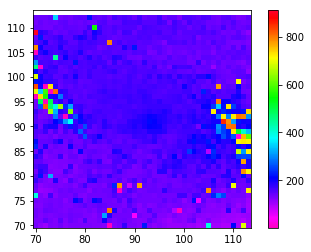

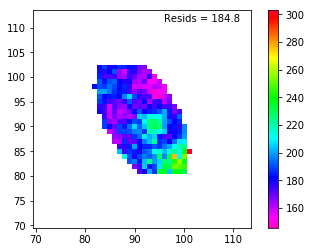

In [104]:
'''
You now need to plot the velocity map to compare it to the 
actual map.
'''
os.chdir(os.path.expanduser('/Volumes/My Passport For Mac/LAURA_SIMS/kinemetry_input/'))

print(os.getcwd())
file_velcirc='myfile_v_1.txt'
size=183
stel_vel_model=np.zeros((size,size))
stel_sig_model=np.zeros((size,size))


with open(file_velcirc, 'r') as f:
    data = f.readlines()
    
    
    x_list_model=[]
    y_list_model=[]
    vel_circ_model=[]
    vel_kin_model=[]
    for line in data:
        words = line.split()
        #print(words)
        if words[6]=='*************************':
            continue
        else:
            x_list_model.append(float(words[0]))
            y_list_model.append(float(words[1]))
            vel_circ_model.append(float(words[6]))
            vel_kin_model.append(float(words[7]))
            stel_vel_model[float(words[0])-size/2,float(words[1])-size/2] = float(words[6])
            stel_sig_model[float(words[0])-size/2,float(words[1])-size/2] = float(words[7])
  


stel_vel_model=((ma.masked_where(stel_vel_model==0, stel_vel_model)))
plt.imshow(stel_vel_model,vmin=-100, vmax=100, cmap='gist_rainbow_r')
plt.xlim([size/2-(dia-0.5),size/2+(dia-0.5)])
plt.ylim([size/2-(dia-0.5),size/2+(dia-0.5)])
plt.colorbar()

plt.show()

plt.imshow(np.rot90(rotated), vmin=-100, vmax=100, cmap='gist_rainbow_r')
plt.colorbar()
plt.xlim([size/2-(dia-0.5),size/2+(dia-0.5)])
plt.ylim([size/2-(dia-0.5),size/2+(dia-0.5)])
plt.show()

plt.imshow(abs(np.flipud(rotated) - stel_vel_model),vmin=0, vmax=50, cmap='gist_rainbow_r')

plt.xlim([size/2-(dia-0.5),size/2+(dia-0.5)])
plt.ylim([size/2-(dia-0.5),size/2+(dia-0.5)])
plt.colorbar()
plt.annotate(r'Resids = '+str(round(np.mean(abs(rotated - stel_vel_model)),1)), xy=(0.6,0.95), xycoords='axes fraction')
plt.show()




'''
~~~~~~~Sigs~~~~~~~
'''
stel_sig_model=((ma.masked_where(stel_sig_model==0, stel_sig_model)))
plt.imshow(stel_sig_model, cmap='gist_rainbow_r')
plt.xlim([size/2-(dia-0.5),size/2+(dia-0.5)])
plt.ylim([size/2-(dia-0.5),size/2+(dia-0.5)])
plt.colorbar()

plt.show()

plt.imshow(np.flipud(rotated_sig), cmap='gist_rainbow_r')
plt.colorbar()
plt.xlim([size/2-(dia-0.5),size/2+(dia-0.5)])
plt.ylim([size/2-(dia-0.5),size/2+(dia-0.5)])
plt.show()

plt.imshow(abs(np.flipud(rotated_sig) - stel_sig_model), cmap='gist_rainbow_r')

plt.xlim([size/2-(dia-0.5),size/2+(dia-0.5)])
plt.ylim([size/2-(dia-0.5),size/2+(dia-0.5)])
plt.colorbar()
plt.annotate(r'Resids = '+str(round(np.mean(abs(rotated_sig - stel_sig_model)),1)), xy=(0.6,0.95), xycoords='axes fraction')
plt.show()